<h1>Метод простой итерации</h1>

Рассмотрим СЛАУ: $Ax=f$.<br>
$a_{ij}=\frac{1}{i+j+11},$ $i,j=1,\ldots,n;$ $n=10$,
$f = a + (b-a)\cdot random,$ $a,b\:-$ произвольные числа $a<b$.

Положим $a = 0,\:b = 1.$


Зададим матрицу $A$ и вектор $f$:

In [1]:
import numpy as np
from random import random, seed


mnorm = None
vecnorm = None


def get_matrix(n=10):
    seed()
    return np.array([[1 / (i + j + 11) if i != j else 111 for i in range(1, n + 1)] for j in range(1, n + 1)])


def get_f(n=10, a=0, b=1):
    return np.array([a + b * (b - a) * random() for _ in range(n)])

Напишем функцию `to_iter`, которая решит СЛАУ вида $Ax=f$ методом простой итерации вида $x=Hx+\varphi,$ где
$H=E-\tau A$. Точность $\varepsilon = 10^{-3}.$

In [2]:
def to_iter(a, v, t=1, eps=1e-3):

    phi = np.array([p / s for p, s in zip(v, np.diag(a))])
    h = np.diagflat(np.ones(len(a))) - t * a

    xs = phi.copy()
    xn = phi + np.dot(h, xs)
    q = np.linalg.norm(h, ord=mnorm)
    print(f"Норма матрицы H: {q}")
    inaccs = []
    cntr = 0
    while True:
        inacc = abs(q * np.linalg.norm(xn - xs, ord=vecnorm) / (1 - q))
        xs, xn = xn, phi + np.dot(h, xs)
        inaccs.append(inacc)
        cntr += 1
        if inacc <= eps:
            break
    return xn, inaccs

Нарисуем график убывания погрешности $\frac{q}{1-q}||xn-xs||$ на каждой итерации для различных параметров
$\tau\in\{\frac{1}{2||A||},\:\frac{1}{4||A||},\:\frac{1}{8||A||}\}$

A
[[1.11000000e+02 7.14285714e-02 6.66666667e-02 6.25000000e-02
  5.88235294e-02 5.55555556e-02 5.26315789e-02 5.00000000e-02
  4.76190476e-02 4.54545455e-02]
 [7.14285714e-02 1.11000000e+02 6.25000000e-02 5.88235294e-02
  5.55555556e-02 5.26315789e-02 5.00000000e-02 4.76190476e-02
  4.54545455e-02 4.34782609e-02]
 [6.66666667e-02 6.25000000e-02 1.11000000e+02 5.55555556e-02
  5.26315789e-02 5.00000000e-02 4.76190476e-02 4.54545455e-02
  4.34782609e-02 4.16666667e-02]
 [6.25000000e-02 5.88235294e-02 5.55555556e-02 1.11000000e+02
  5.00000000e-02 4.76190476e-02 4.54545455e-02 4.34782609e-02
  4.16666667e-02 4.00000000e-02]
 [5.88235294e-02 5.55555556e-02 5.26315789e-02 5.00000000e-02
  1.11000000e+02 4.54545455e-02 4.34782609e-02 4.16666667e-02
  4.00000000e-02 3.84615385e-02]
 [5.55555556e-02 5.26315789e-02 5.00000000e-02 4.76190476e-02
  4.54545455e-02 1.11000000e+02 4.16666667e-02 4.00000000e-02
  3.84615385e-02 3.70370370e-02]
 [5.26315789e-02 5.00000000e-02 4.76190476e-02 4.5454545

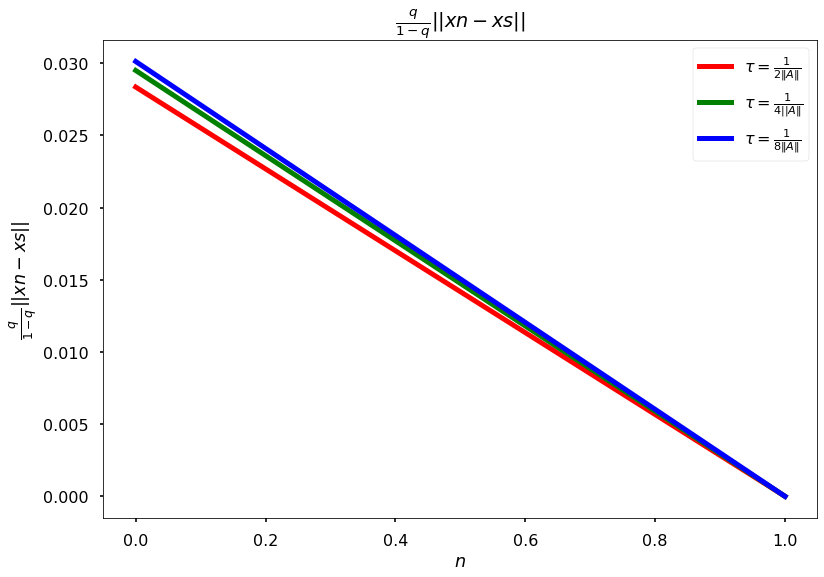

In [3]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

matrix = get_matrix()
f = get_f()
print(f"A\n{matrix}\n", f"f\n{f}\n")


matr_norm = np.linalg.norm(matrix, ord=mnorm)
tau = [1 / (i * matr_norm) for i in [2, 4, 8]]
x = []
accs = []


for l in tau:
    w = to_iter(matrix, f, t=l)
    x.append(w[0])
    accs.append(w[1])
    print(f"\ntau = {l}\n")
    print(f"\nРешение с помощью встроенной функции:\n{np.linalg.solve(matrix, f)}\n",
          f"\nС помощью написанной:\n{x[-1]}")
    print(f"\nПогрешности:\n{accs[-1]}")


fig, ax = plt.subplots()
ax.plot([i for i in range(len(accs[0]))], accs[0], label='$\\tau=\\frac{1}{2\Vert A\Vert}$', linewidth=5, color='red')
ax.plot([i for i in range(len(accs[1]))], accs[1], label='$\\tau=\\frac{1}{4||A\Vert}$', linewidth=5, color='green')
ax.plot([i for i in range(len(accs[2]))], accs[2], label='$\\tau=\\frac{1}{8\Vert A\Vert}$', linewidth=5, color='blue')
ax.set_ylabel('$\\frac{q}{1-q}||xn-xs||$')
ax.set_xlabel('$n$')
ax.set_title("$\\frac{q}{1-q}||xn-xs||$")
ax.legend()